# Descriptive Statistics and Visualization

**This is a lesson taught at PyHawaii on November 6th 2019**

In this lesson, we will be discussing descriptive statistics using Python. The main principle of descriptive statistics is to summarize and organize data so that it can be easily understood. And, as the name implies, it is only interested in describing the sample (the data). If you would like to make infereces about a population from a sample, that is referred to as inferential statistics (which I plan to cover in a future lesson).

This lesson will be divided into two parts, we will... 

1. Cover some fundamental theory using two very popular libraries for statistical analysis, `NumPy` and `Scipy`, as well as `Matplotlib` for quick visualizations.
2. Transistion to `Pandas` and `Plotly` for more in depth data exploration and visualization on some real data.

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use("seaborn-bright")

# Part 1: Statistics Foundations

In this section we cover some fundamental statistics. These notes are by no ones means all ecompasing. Rather, it is meant to be a broad introduction to fundamental concepts important to prospective data scientists.

## Mean, Median, Mode as Metrics for Central Tendency

Here I described three fundamental statistics used quite often statistics to describe "central tendency." Well..."central" to what, exactly? Specifically, central tendency revolves are the idea that one number can be used to summarize a set of measurements, which is in someway "central" to the set. We will dive more into this in a following section about _probability distributions_. For now, just think about it as finding the "middle" of a set of numbers.

Of course there are different levels of statistics depending on the data, often we deal with _sample_ or _population_ statistics. Fortunately the computations are similar, and you can gain different insights about the data.

### Mean

The most common metric for estimating central tendency is the mean. When we talk about an "average," we are usually talking about the mean. Given a set of data, $x$, the arithmetic mean is computed by (1) summing all the elements in the set then (2) dividing by the number of elements. To represent this mathematically,

$$ \text{Mean} = \frac{1}{N} \sum_{i=1}^{N} x_i $$

Depending on your math experience, that may just look a mess of symbols. As an example, suppose we had the following set of numbers:

$$x = \{13, 10, 10,  6,  9,  9,  9,  8,  9,  9 \}$$


If we wanted to calculate the arithmetic mean, 

1. Sum all the elements: $13 + 10 + 10 +  6 +  9 +  9 +  9 +  8 +  9 +  9 = 92$
1. Divide by the number of elements: $92 / 10 = 9.2$

Thus, we can conclude for our set of data, it's arithmetic mean is $9.2$.

Now, let us compute the mean using `NumPy`,

In [6]:
x = np.array([13, 10, 10,  6,  9,  9,  9,  8,  9,  9])

x_mean = np.mean(x)

print(f"The mean: {x_mean}")

The mean: 9.2


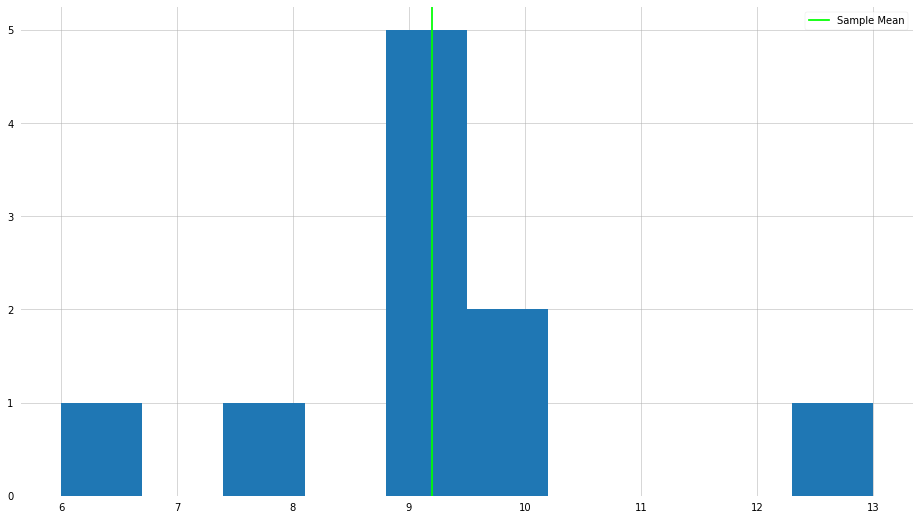

In [7]:
plt.hist(x)
plt.axvline(x_mean, color="lime", label="Sample Mean")

plt.legend()
plt.show()

As you can see, we achieve the expected result. However, a fundamental flaw of the mean is that it is often sensitive to "outliers"&mdash;we will go into more detail about what it means to be an outlier. Let us do the same procedure as above, but let us make on the elements very large.

In [8]:
x_new = np.array([13, 10, 10,  6,  9,  9,  9,  8,  9,  9, 50])

x_new_mean = np.mean(x_new)

print(f"The new mean: {x_new_mean}")

The new mean: 12.909090909090908


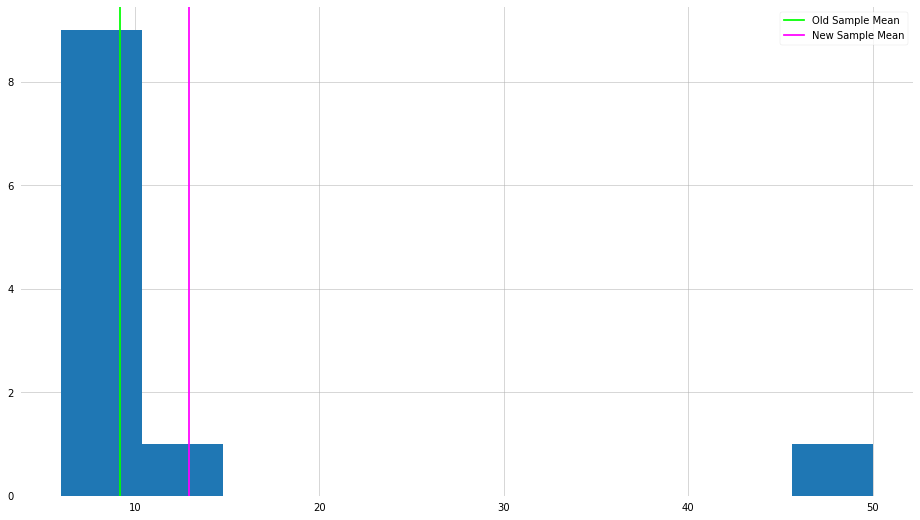

In [9]:
plt.hist(x_new)
plt.axvline(x_mean, color="lime", label="Old Sample Mean")
plt.axvline(x_new_mean, color="magenta", label="New Sample Mean")
plt.legend()
plt.show()

As you can see, by changing one element in the set, the mean has shifted dramatically. Surely if we were interested in the "center" of the numbers, is it informative to be so influenced by one very large number?

### Median

The median is another popular metric for central tendency, and is less influenced by the presence of outliers. The median is computed by (1) sorting the numbers in ascending order, (2) finding the middle number.

Again, suppose we had the same set of numbers, but scrambled:

$$x = \{13, 10, 10,  6,  9,  9,  9,  8,  9,  9\}$$

If we wanted to calculate the median,

1. Sort the numbers: $\{6, 8, 9, 9, 9, 9, 9, 10, 10, 13\}$
2. Find the middle number: $9$

Thus, we can conclude for our set of data, the median is $9$, which is **not** in agreement with our mean. Let's see how this is done with `NumPy`.

In [10]:
x_median = np.median(x)

print(f"The median: {x_median}")

The median: 9.0


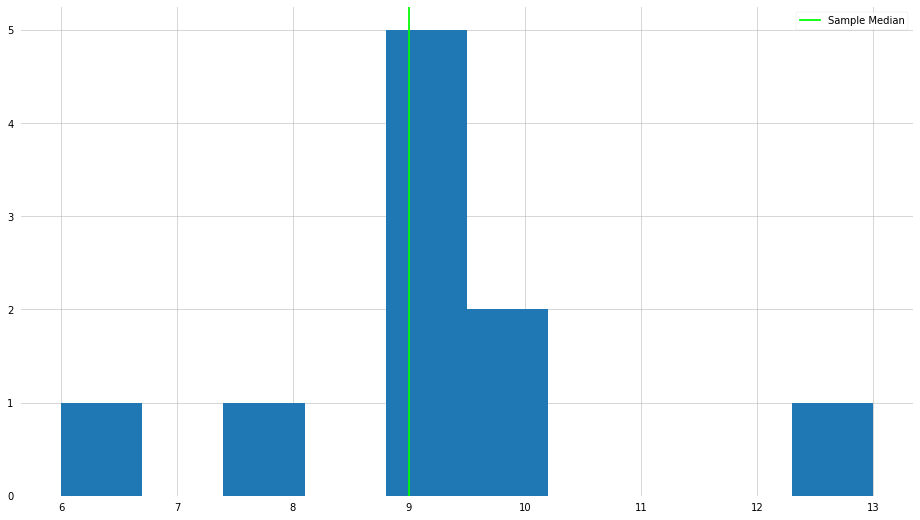

In [11]:
plt.hist(x)
plt.axvline(x_median, color="lime", label="Sample Median")

plt.legend()
plt.show()

Now, let us take a look at the median when there is an outlier element in the set.

In [12]:
x_new_median = np.median(x_new)

print(f"The new median: {x_new_median}")

The new median: 9.0


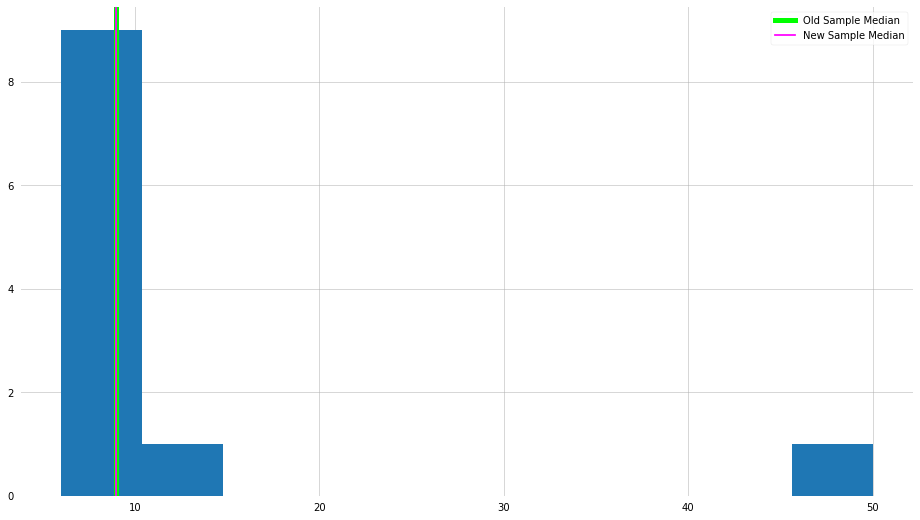

In [13]:
plt.hist(x_new)
plt.axvline(x_median, color="lime", lw=5, label="Old Sample Median")
plt.axvline(x_new_median, color="magenta", label="New Sample Median")
plt.legend()
plt.show()

As we can see, in this example, the median is not influenced by the presence of that outlier.

### Mode

Finally, the Mode. The mode is a simple, and easy to understand computation&mdash;which value appears most frequently in our set of numbers?

Suppose we have the following set of numbers,

$$x = \{13, 10, 10,  6,  9,  9,  9,  8,  9,  9\}$$

The mode of this set is $9$, which appears 5 times.

In [14]:
x_mode = stats.mode(x)

print(x_mode)

ModeResult(mode=array([9]), count=array([5]))


In [15]:
x_new_mode = stats.mode(x_new)

print(x_new_mode)

ModeResult(mode=array([9]), count=array([5]))


As we can see, the mode also isn't influenced by the outlier. However, what happens if there are no duplicate values in the set? This isn't so hard to imagine, as many times we are dealing with continuous signals. The mode is often very useful when working with discretized (or categorical) data.

Let us compare them all side-by-side,

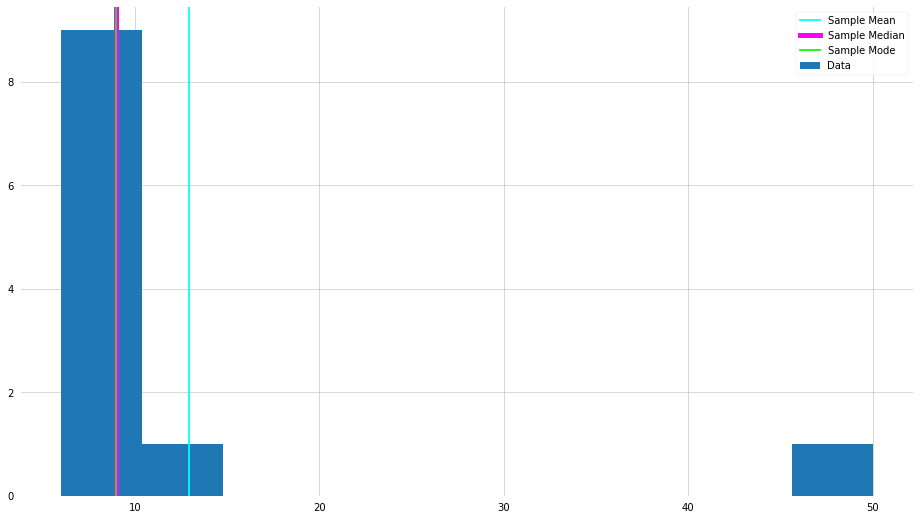

In [16]:
plt.hist(x_new, label="Data")
plt.axvline(x_new_mean, color="cyan", label="Sample Mean")
plt.axvline(x_new_median, color="magenta", lw=5, label="Sample Median")
plt.axvline(x_new_mode[0], color="lime", label="Sample Mode")

plt.legend()
plt.show()

## Metrics for Spread/Dispersion

Spread and dispersion refer to how much your data differs from the "center". For example, think of height. The average male height in the state of Hawaii is about 5'9". Surely, not every male in Hawaii is exactly 5'9"? This is where dispersion is important for describing the data. Below are two common metrics for spread/dispersion&mdash;of course, there are many more to choose from!

### Variance

Again, the variance is used to describe how much your data differs from the "center"&mdash;in this case, the average, specifically.

$$\sigma^2 = \frac{\sum_{i=0}^{N} (x_i - \mu)^2}{N}$$

where $N$ is the number of measurments, $x_i$ is the "$i$-th" data point, and $\mu$ is the mean of the sample. In words, the variance is the squared difference between each of the measurments and the mean, divided by the number of data points.

Here's how the variance can be computed with `NumPy`,

In [17]:
x_var = np.var(x_new, ddof=1)

print(f"Sample Variance = {x_var}")

Sample Variance = 154.0909090909091


Wait...what is that `ddof` keyword we specified? This refers to _Delta Degrees of Freedom_, and is a biproduct of _sample_ level versus _population_ level statistics mentioned previously. Diving into this may be beyond the scope of this lesson, but essentially the denominator in the variance calculation&mdash;referred to as the Bessel Correction&mdash;is $N-1$ on sample level computations, and $N$ on population level statistics. The difference between the two is whether the "average" is the "real" average, or whether it is just an approximation of what the average should be.

TL;DR - Use `ddof=1` for a sample, and `ddof=0` (default) with a population.

### Standard Deviation

The standard deviation is another metric for spread, and tells a similar story to variance, infact it is defined as,

$$\sigma = \sqrt{\sigma^2}$$

That is to say, the square root of the variance.

In [18]:
x_std = np.std(x_new, ddof=1)
print(f"Sample Standard Deviation = {x_std:.2e}")

Sample Standard Deviation = 1.24e+01


The standard deviation is prefered because it is more physically interpretible than the variance (and also unit consistency), which we will discuss further in the next section.

### The Percentile

Another metric related to spread is the percentile, which describes the position of a data point within a set. For example, given our set of numbers, how would the number 8 be "ranked":

$$x = \{13, 10, 10,  6,  9,  9,  9,  8,  9,  9\}$$

Start by ordering the elements, $\{6, 8, 9, 9, 9, 9, 9, 10, 10, 13\}$.

Then the number 8, as an example, is the 10th percentile because only 10% of the measurments are lower than it. Similarly, 11 is in the 90th percentile.

In [19]:
x_percentile = np.percentile(x_new, 90)

print(x_percentile)

13.0


The idea of **quartiles** is very similar, you just divide the set of numbers into four quarters, and say which "quartile" the data point is in.

## From Statistics to Probability

The metrics we just discussed are used to determine the "middle" of _something_ and how values are spread around the "middle." When used together they can suggest something about the shape of the underlying probability distribution. Where a probability distribution can be used to describe the frequency that different values appear&mdash;of course there are many more uses.

Depending on whether you are dealing with continuous or descrete measurments, you will be interested in either a Probability Density Function (PDF) or Probability Mass Function (PMF). The same principal applies, just slightly different computations.

Below are some common probability distributions.

### Uniform (Flat) Distribution

The uniform distribution states that all values are equally probable. For example, consider a dice. Assuming the dice is fair, all values $\{1, 2, 3, 4, 5, 6\}$ are equally likely to appear. Specifically, each value has a probability of $1/6$.

<img src=https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg width="500px">

Mathematically, given samples on the domain $x \in [a,b]$

- For a continuous signal,

$$P(x) = \begin{cases} \frac{1}{(b - a)}, & a\le x\le b \\ 0 & otherwise \end{cases}$$

- For a discrete signal,

$$P(x) = \begin{cases} \frac{1}{(b - a + 1)}, & a\le x\le b \\ 0 & otherwise \end{cases}$$

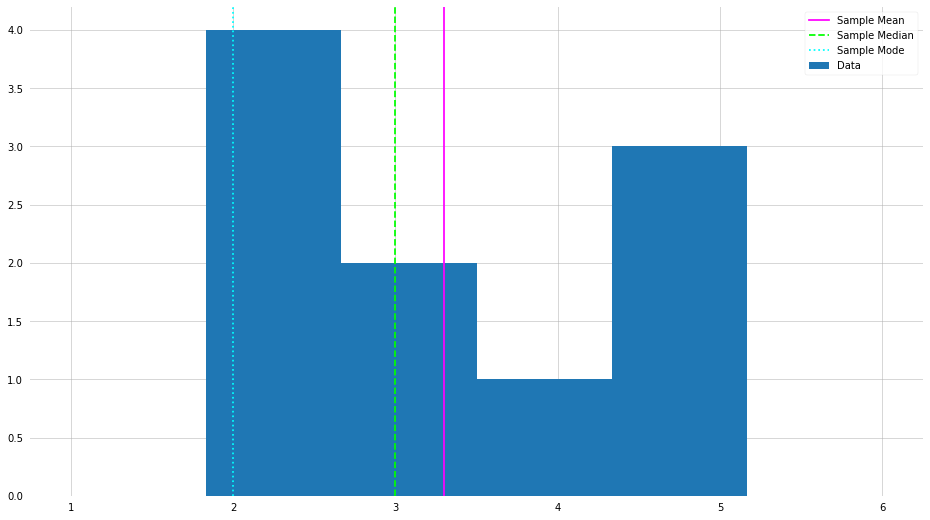

In [20]:
X = np.random.randint(1, 6+1, size=10)

plt.hist(X, bins=6, label=f"Data", range=(1,6))
plt.axvline(X.mean(), label="Sample Mean", color="magenta")
plt.axvline(np.median(X), label="Sample Median", color="lime", ls="--")
plt.axvline(stats.mode(X)[0], label="Sample Mode", color="cyan", ls=":")

plt.legend()
plt.show()

### Normal (Gaussian or Bell Curve) Distribution

The normal distribution is another example of a symmetric distribution, and resembles a "bell shape. It is one of the most common distributions, and has various usel properties. The Gaussian has the functional form,

$$P(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

For example, the 3-$\sigma$ rule.

<img src=https://www.mathsisfun.com/data/images/normal-distrubution-3sds.svg width="250px">

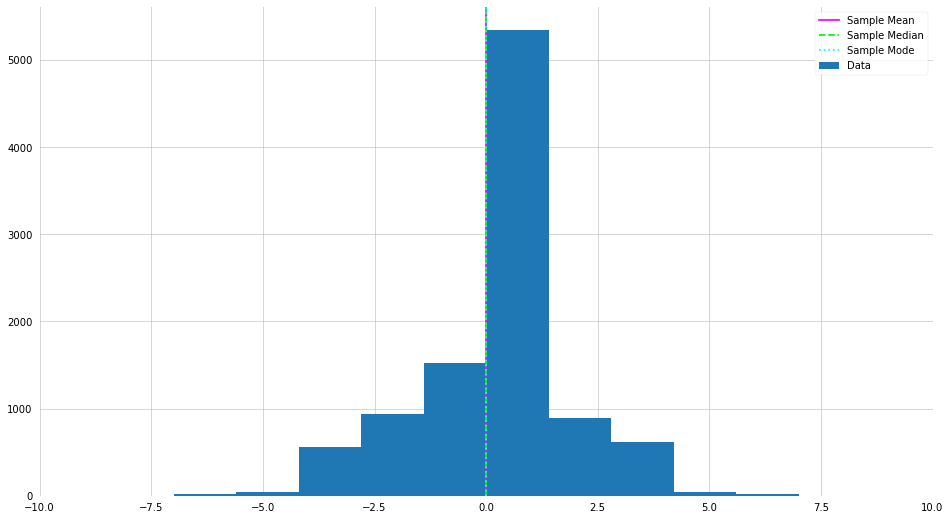

In [21]:
X = np.random.normal(loc=0, scale=2, size=10000).astype(int)
# Trying changing the sample size and "scale"

plt.hist(X, label="Data")
plt.axvline(X.mean(), label="Sample Mean", color="magenta")
plt.axvline(np.median(X), label="Sample Median", color="lime", ls="--")
plt.axvline(stats.mode(X)[0], label="Sample Mode", color="cyan", ls=":")

plt.xlim(-10, 10)
plt.legend()
plt.show()

There are many more distributions, but for the sake of time we will stop with Uniform and Normal. If you are interested in seeing all the distributions you have access to in NumPy and Scipy, check the [docs](https://docs.scipy.org/doc/scipy/reference/stats.html).

# Part 2: Descriptive Statistics on Real Data

Now, we take a step back and apply the things we learned to some real data! Here we will compute and visualize some descriptive statistics for an publicly available dataset.

In [32]:
import pandas as pd
import plotly_express as px
import plotly

In [33]:
df = px.data.iris()

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


Let us compute some statistics about the data to understand what is going on. Fortunately, the Pandas library has some awesome tools built in to do this quickly.

In [34]:
print(df["sepal_length"].mean())

print(df["sepal_length"].median())

print(df["sepal_length"].std())

print(df["sepal_length"].var())

5.843333333333334
5.8
0.828066127977863
0.6856935123042507


In [35]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


## Visualization

Now, let us visualize the data in a slightly more useful way than a static table. First, we can create a scatter plot to inspect how sepal length and sepal width are related.

### Scatter Plots

In [40]:
# px.scatter(df, x="sepal_length", y="sepal_width")
# px.scatter(df, x="sepal_length", y="sepal_width", color="species", size="species_id")
# px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="rug", marginal_x="histogram")
px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin", marginal_x="box", trendline="ols")

### Density Plots

In [38]:
# px.density_contour(df, x="sepal_width", y="sepal_length", color="species")
px.density_contour(df, x="sepal_width", y="sepal_length", color="species", marginal_x="rug", marginal_y="histogram")

### Correlation Matrix

In [39]:
# px.scatter_matrix(df)
px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species").update_traces(showupperhalf=False, diagonal_visible=False)

## Example of the Central Limit Theorem

This example came about from a question related to the central limit theorem. Here I will draw 10 samples from a uniform distribution and record the mean of the samples. We then repeat this process 1000 times and plot a histogram of the results.

In [29]:
means = []
for i in range(10000):
    X = np.random.uniform(0, 1, 10)
    means.append(X.mean())

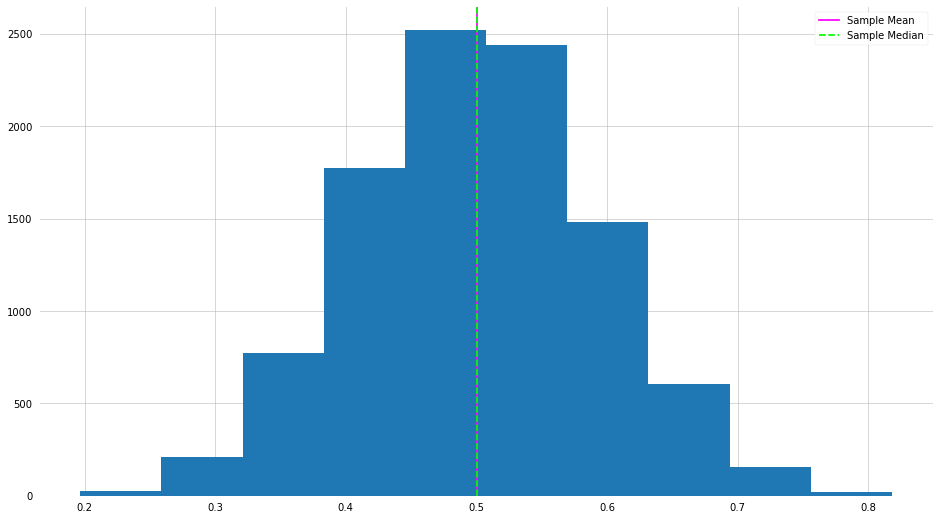

In [30]:
plt.hist(means)

plt.axvline(np.mean(means), label="Sample Mean", color="magenta")
plt.axvline(np.median(means), label="Sample Median", color="lime", ls="--")

plt.legend()
plt.show()

Hmmm this looks oddly familiar. This is a direct example of the central limit theorem in action.